# Implicit Radiation Transport Tests
#### ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), § 4)
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/28/2023          |
| Updated |  09/25/2023          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$


## 4.1. Thermal Equilibrium in a Uniform Medium

Assuming total energy conservation,
\begin{align*}
    E_\mathrm{r,init} + E_\mathrm{g,init} &= E_\mathrm{r,eq} + E_\mathrm{g,eq} \\
    E_\mathrm{r,init} + \frac{P_\mathrm{init}}{\gamma - 1} &= a_\mathrm{r}T_\mathrm{eq}^4 + \frac{P_\mathrm{eq}}{\gamma - 1} \\
    E_\mathrm{r,init} + \frac{\rho R T_\mathrm{init}}{\gamma - 1} &= \left(\frac{\mathbb{P}\rho_0 R T_0}{T_0^4}\right)T_\mathrm{eq}^4 + \frac{\rho R T_\mathrm{eq}}{\gamma - 1} \\
    \left(\frac{\mathbb{P}\rho_0}{T_0^3}\right)T_\mathrm{eq}^4 + \frac{\rho T_\mathrm{eq}}{\gamma - 1} -\frac{E_\mathrm{r,init}}{R} - \frac{\rho T_\mathrm{init}}{\gamma - 1} &= 0 \\
    a T_\mathrm{eq}^4 + bT_\mathrm{eq} + c &= 0,
\end{align*}
where $a = \mathbb{P}\rho_0/T_0^3$, $b = \rho/(\gamma -1)$, and $c = -E_\mathrm{r,init}/R - bT_\mathrm{init}$.

/home/stanley/github/PrincetonUniversity/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


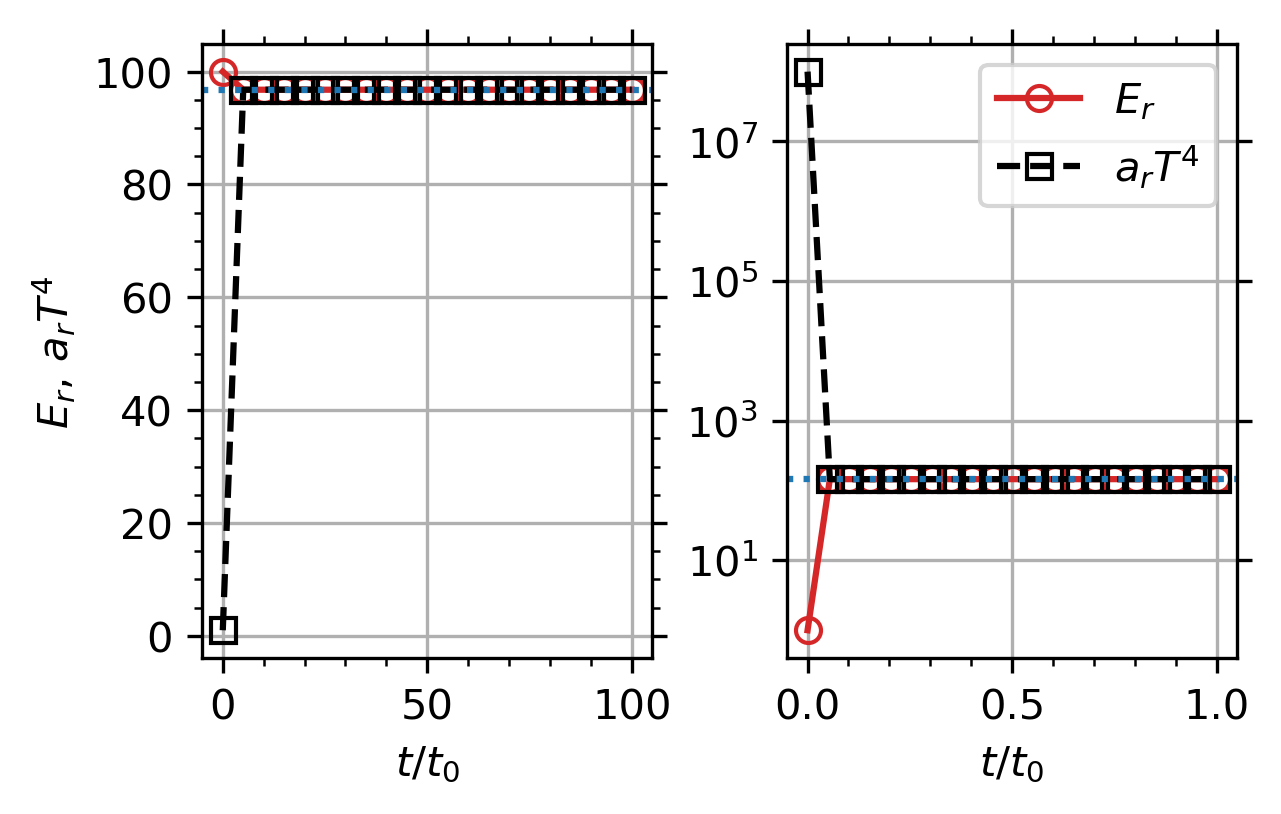

In [14]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def analytic(athinput, R=1):
    gamma = athinput['hydro']['gamma']   # C_p/C_v = 1 + 2/DoF
    prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
    Er_init = athinput['problem']['er']  # initial mean energy density
    Tinit = athinput['problem']['tgas']  # initial gas temperature
    rho = 1
    b = rho/(gamma - 1)
    c = -Er_init/R - b*Tinit
    coef = [c, b, 0, 0, prat]
    poly = Polynomial(coef, symbol='Teq')
    roots = poly.roots()
    reals = roots.real[abs(roots.imag) < 1e-5]
    Teq = reals[reals > 0]
    return Teq

fig, axs = plt.subplots(1, 2, figsize=(4.45, 2.66), dpi=300)
path = 'thermal_relaxation/'

# Test 1
athinput = athena_read.athinput(path + 'athinput.thermal_relaxation')
Teq = analytic(athinput=athinput)
hst = athena_read.hst(path + 'output/thermal.hst')
T = (hst['tot-E']*(gamma - 1))           # thermal_relaxation.cpp, line 63
axs[0].plot(hst['time'], hst['Er'], color='tab:red', marker='o',
            fillstyle='none')
axs[0].plot(hst['time'], T**4, color='k', marker='s', ls='--',
            fillstyle='none')
axs[0].axhline(y=Teq**4, color='tab:blue', ls=':')
axs[0].set(ylabel='$E_r,\,a_rT^4$')

# Test 2
athinput = athena_read.athinput(path + 'athinput.thermal_relaxation2')
Teq = analytic(athinput=athinput)
hst = athena_read.hst(path + 'output/thermal2.hst')
T = (hst['tot-E']*(gamma - 1))           # thermal_relaxation.cpp, line 63
axs[1].semilogy(hst['time'], hst['Er'], color='tab:red', marker='o',
                fillstyle='none',              label='$E_r$')
axs[1].semilogy(hst['time'], T**4, color='k', marker='s', ls='--',
                fillstyle='none', label='$a_rT^4$')
axs[1].axhline(y=Teq**4, color='tab:blue', ls=':')
axs[1].legend()

for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xlabel='$t/t_0$')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0, wspace=0.3)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

Cf. Figure 1 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))

**NOTE**: $T \propto P = \rho(\gamma - 1)u$, where $u$ is the specific internal energy of the gas [(Classical ideal gas law)](https://en.wikipedia.org/wiki/Equation_of_state#Classical_ideal_gas_law).

## 4.2. Crossing Beams in Vacuum

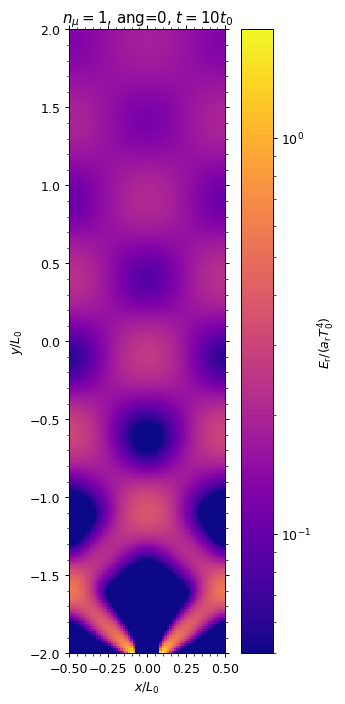

In [24]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam/nmu'
nmu = 1
ang = 0
vmin, vmax = 0.05, 2
fig, ax = plt.subplots(figsize=(4.68, 9), dpi=90)

# Read and plot
path = f'{wd}/{nmu}/ang{ang}'
athinput = athena_read.athinput(f'{path}/athinput.beam')
pid = athinput['job']['problem_id']
nmu = athinput['radiation']['nmu']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.00001.athdf')
t = athdf['Time']
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, ang={ang}, $t={t:.0f}t_0$')#, fontsize='medium')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)

plt.savefig('figs/frame.jpg', bbox_inches='tight')

### Light-crossing Time

Assuming $L_y$ is the vertical height of the box, $\theta$ is the oblique beam-injection angle with respect to the $x$-axis, and $L_\mathrm{cross} = L_y/\sin\theta$ is the total distance to cross the box,
\begin{align*}
    t_\mathrm{cross} &= \frac{L_\mathrm{cross}}{c} \\
    \frac{t_\mathrm{cross}}{t_0} &= \frac{L_y}{\mathbb{C}\sin\theta L_0},
\end{align*}
since $t_0 = \mathbb{C}L_0/c$.

t_cross/t₀ = 5.66


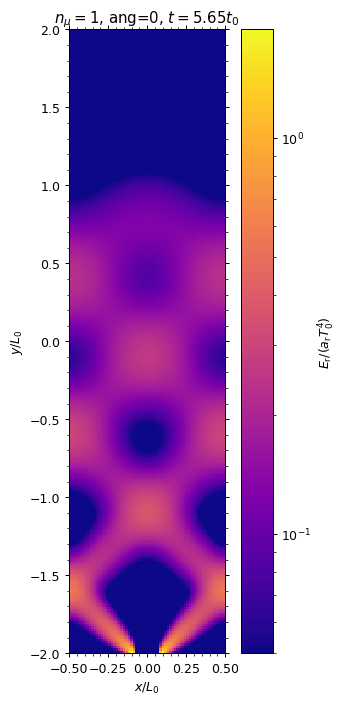

In [38]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam/nmu'
nmu = 1
ang = 0

# Read and compute
path = f'{wd}/{nmu}/ang{ang}'
athinput = athena_read.athinput(f'{path}/athinput.beam')
Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
crat = athinput['radiation']['crat']
theta = 1
with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
    angles = Rad_angles.read().splitlines()[22]
    mu_x, mu_y = float(angles.split()[1]), float(angles.split()[2])
    theta = np.arctan(mu_y/mu_x)
t_cross = Ly/crat/np.sin(theta)
print(f't_cross/t₀ = {t_cross:.2f}')

# Read and plot
fig, ax = plt.subplots(figsize=(4.68, 9), dpi=90)
dt_athdf = athinput['output1']['dt']
out_num = int(t_cross//dt_athdf)
pid = athinput['job']['problem_id']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.{out_num:05d}.athdf')
t = athdf['Time']
vmin, vmax = 0.05, 2
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, ang={ang}, $t={t:.2f}t_0$')#, fontsize='medium')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)


Cf. Figure 3 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))

### Parameter Grid

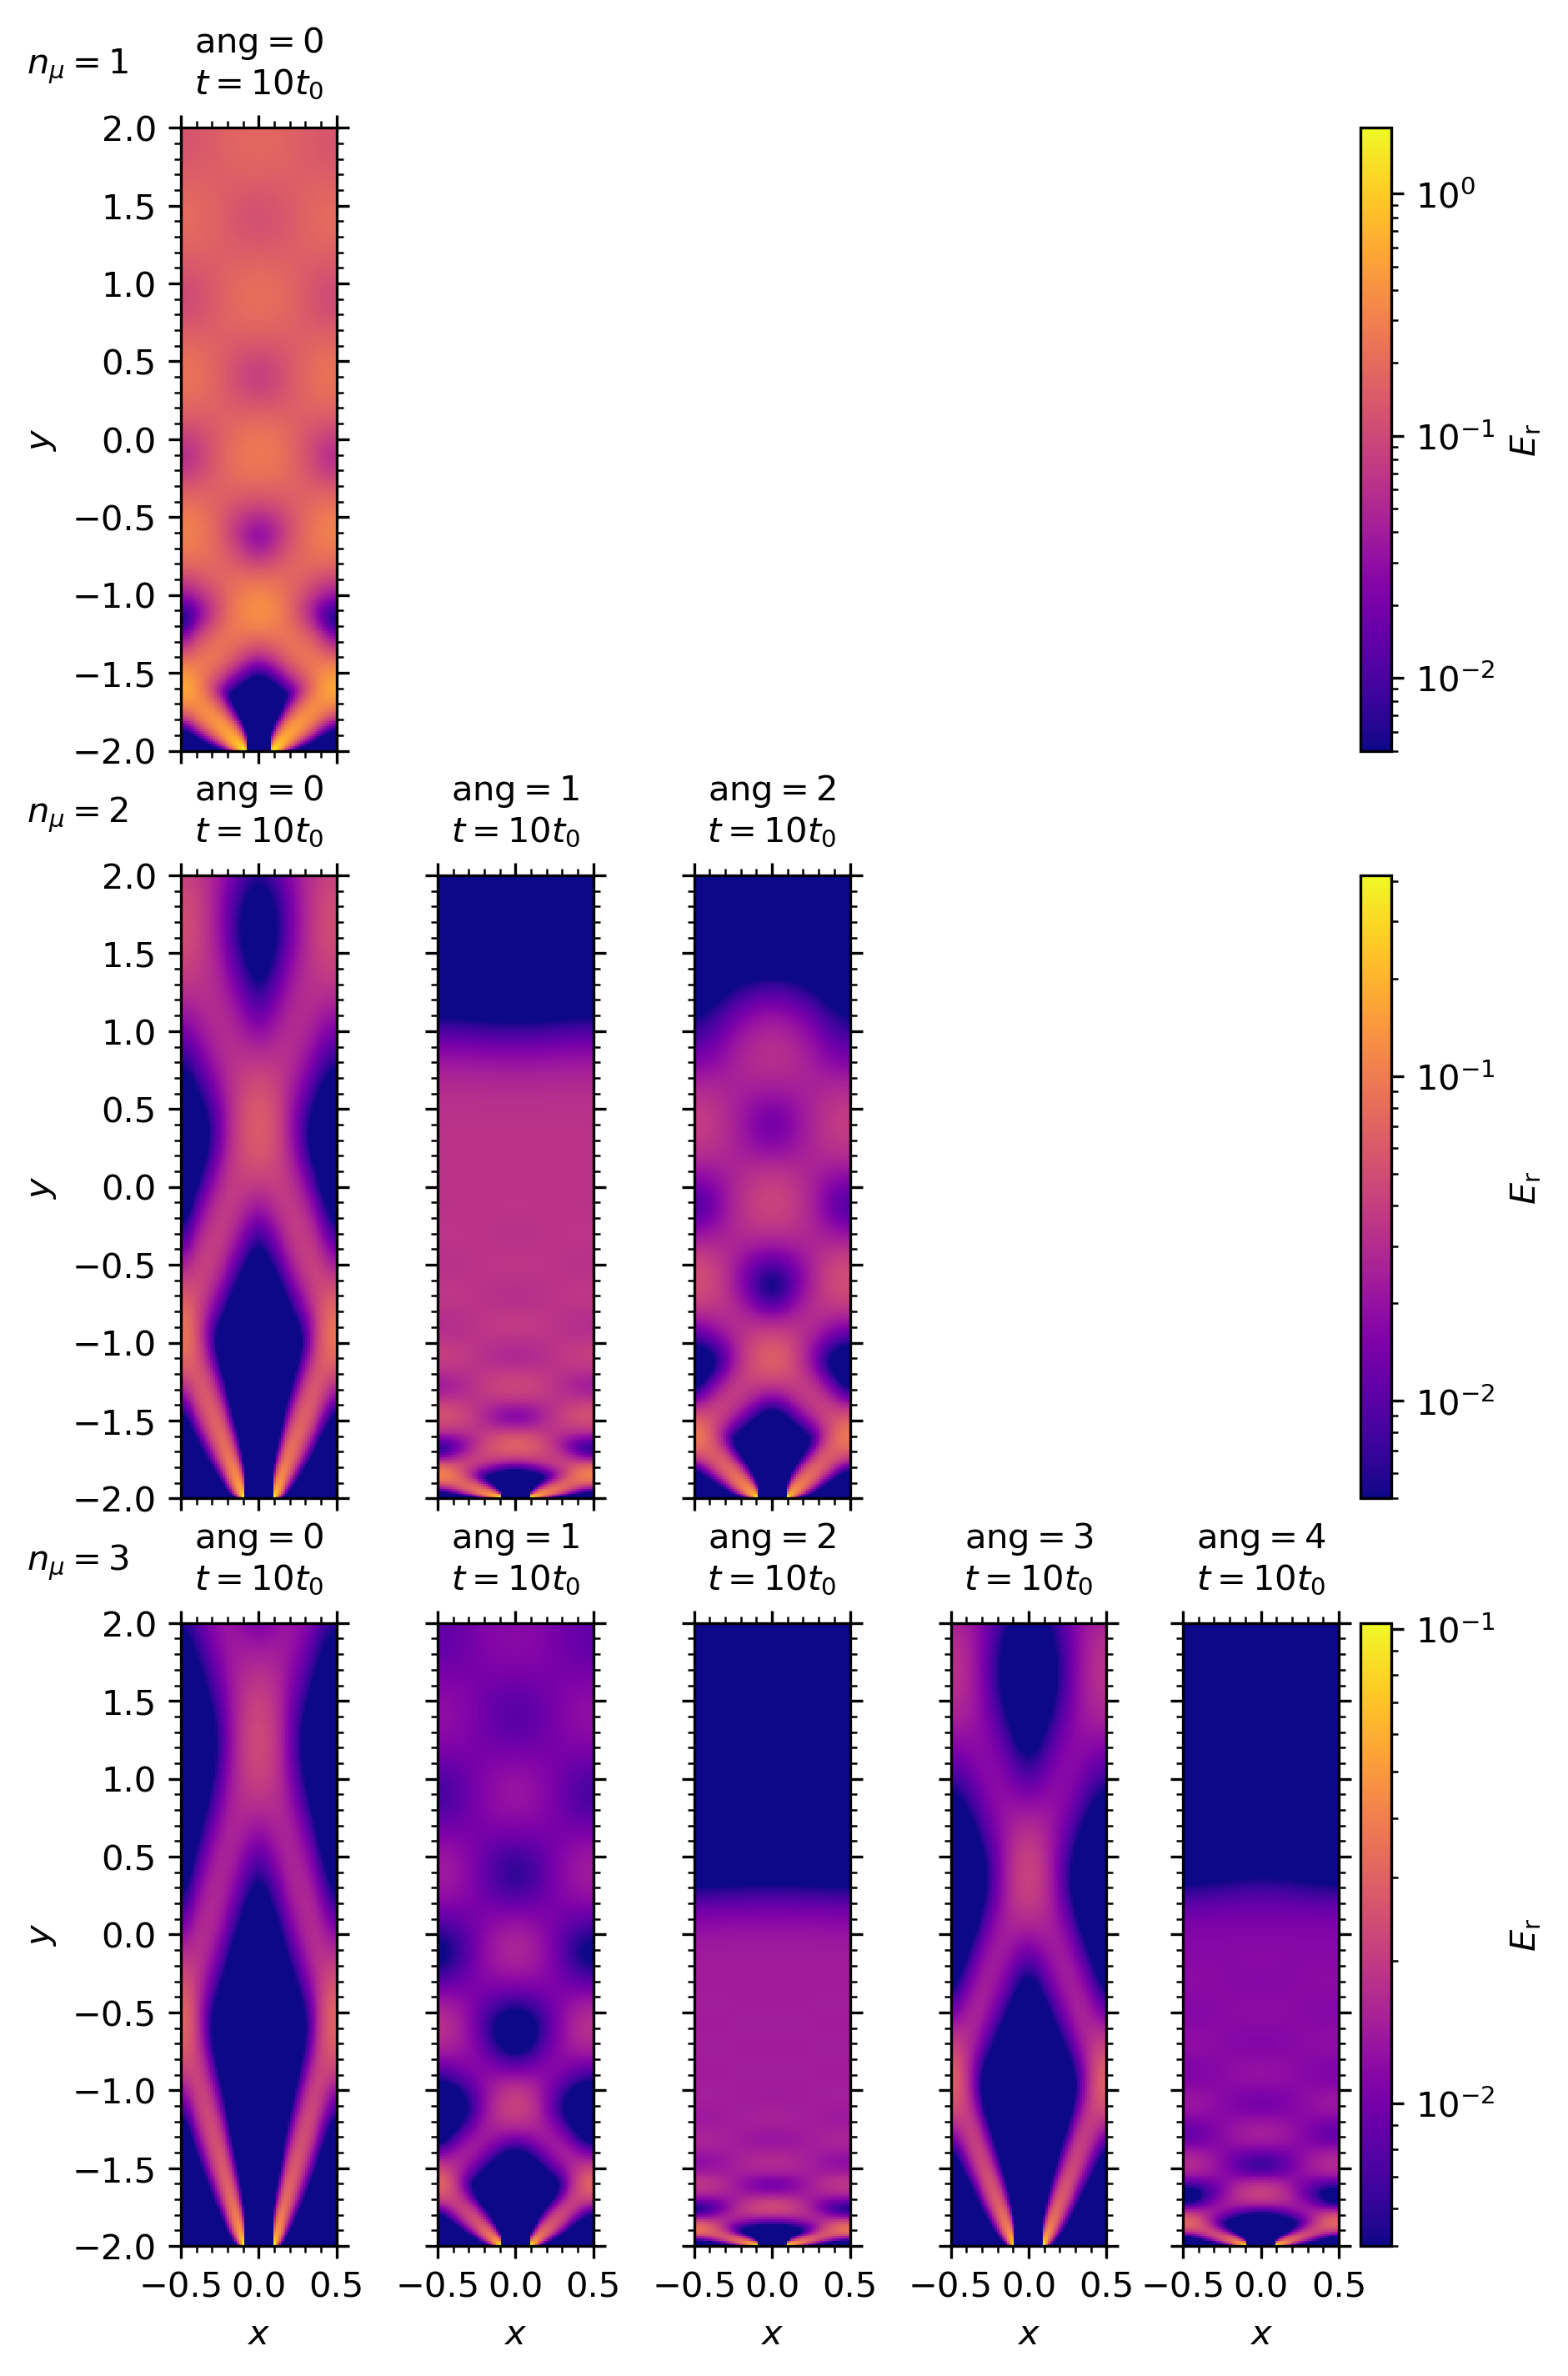

In [113]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam/nmu'
nmus = [1, 2, 3]
angs = [0, 1, 2, 3, 4]
vmin, vmax = 5e-3, 2
fig, axs = plt.subplots(len(nmus), len(angs), dpi=300, figsize=(6.4, 11),
                        sharex=True, sharey=True)

for i, nmu in enumerate(nmus):
    for j, ang in enumerate(angs):
        if ang >= (2*nmu - 1):
            axs[i][j].axis('off')
            continue

        # Read and plot
        path = f'{wd}/{nmu}/ang{ang}'
        athinput = athena_read.athinput(f'{path}/athinput.beam')
        athdf = athena_read.athdf(f'{path}/athdf/beam.out1.00001.athdf')
        t = athdf['Time']
        clip = np.clip(athdf['Er'][0], vmin, vmax)
        Er = axs[i][j].pcolormesh(athdf['x1v'], athdf['x2v'], clip,
                                  cmap='plasma', norm=colors.LogNorm())

        # Format (sub)plots
        axs[i][j].label_outer()
        axs[i][j].minorticks_on()
        axs[i][j].set_title(f'ang$={ang}$\n$t={t:.0f}t_0$', pad=10, fontsize='medium')
        axs[i][j].set(aspect='equal')
        axs[i][j].tick_params(axis='both', which='both', top=True, right=True)

        if i == (len(nmus) - 1): axs[i][j].set(xlabel='$x$')

    fig.colorbar(Er, ax=axs[i][j], pad=0.1, label='$E_\mathrm{r}$')
    axs[i][0].set(ylabel='$y$')
    axs[i][0].text(-0.99, 1.13, f'$n_\mu={nmu}$', ha='left', va='top',
                   transform=axs[i][0].transAxes)

# plt.subplots_adjust(hspace=0.3)#, wspace=-0.9)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

## Beam in Spherical–Polar Vacuum

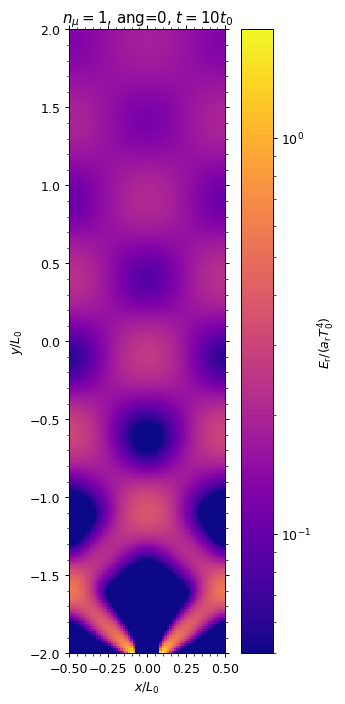

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam_sph/nzeta'
nzeta = 1
ang = 0
vmin, vmax = 0.05, 2
fig, ax = plt.subplots()#figsize=(4.68, 9), dpi=90)

# Read and plot
path = f'{wd}/{nmu}/ang{ang}'
athinput = athena_read.athinput(f'{path}/athinput.beam')
pid = athinput['job']['problem_id']
nmu = athinput['radiation']['nmu']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.00001.athdf')
t = athdf['Time']
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, ang={ang}, $t={t:.0f}t_0$')#, fontsize='medium')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)

plt.savefig('figs/frame.jpg', bbox_inches='tight')

## Appendix

### Compiled with AOCC (`clang++`)

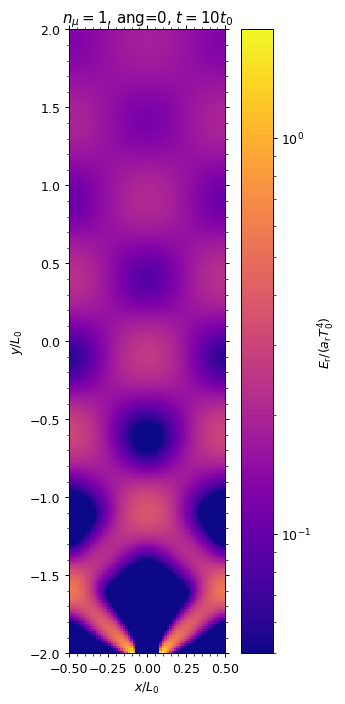

In [7]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

wd = 'beam/nmu'
nmu = 1
vmin, vmax = 0.05, 2
fig, ax = plt.subplots(figsize=(4.68, 9), dpi=90)

# Read and plot
path = f'{wd}/{nmu}/aocc'
athinput = athena_read.athinput(f'{path}/athinput.beam')
pid = athinput['job']['problem_id']
nmu = athinput['radiation']['nmu']
ang = athinput['problem']['ang']
athdf = athena_read.athdf(f'{path}/athdf/{pid}.out1.00001.athdf')
t = athdf['Time']
clip = np.clip(athdf['Er'][0], vmin, vmax)
Er = ax.pcolormesh(athdf['x1v'], athdf['x2v'], clip, cmap='plasma',
                   norm=colors.LogNorm())

# Format (sub)plots
cb_Er = plt.colorbar(Er, label='$E_\mathrm{r}/(a_\mathrm{r}T_0^4)$')
ax.minorticks_on()
ax.set_title(f'$n_\mu={nmu}$, ang={ang}, $t={t:.0f}t_0$')#, fontsize='medium')
ax.set(aspect='equal', xlabel='$x/L_0$', ylabel='$y/L_0$')
ax.tick_params(axis='both', which='both', top=True, right=True)

plt.savefig('figs/frame.jpg', bbox_inches='tight')